In [1]:
import pandas as pd
from prophet import Prophet


In [9]:
train = pd.read_csv("train.csv")
train.head()
df=train[['date','median_sale_price']].copy()
df.rename(columns={'date':'ds', 'median_sale_price': 'y'},  inplace=True)
df.head(1)

,ds,y
0,2013-01-01,117400.0


In [29]:
m = Prophet(seasonality_mode='multiplicative')
m = Prophet(weekly_seasonality=False, daily_seasonality=False)#, yearly_seasonality=False)
# m.add_seasonality(name='yearly', period=365.25, fourier_order=3)
m.fit(df)

23:33:31 - cmdstanpy - INFO - Chain [1] start processing
23:33:31 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
109,2022-02-01,209995.595952,157824.812490,322961.600642,209995.595823,209995.596136,33844.256224,33844.256224,33844.256224,33844.256224,33844.256224,33844.256224,0.0,0.0,0.0,243839.852176
110,2022-03-01,211023.177682,182849.751715,336341.467919,211023.177325,211023.178100,44142.984880,44142.984880,44142.984880,44142.984880,44142.984880,44142.984880,0.0,0.0,0.0,255166.162563
111,2022-04-01,212160.857455,178299.947986,336557.476174,212160.856742,212160.858223,44841.078017,44841.078017,44841.078017,44841.078017,44841.078017,44841.078017,0.0,0.0,0.0,257001.935472
112,2022-05-01,213261.837881,154076.216247,307494.172148,213261.836769,213261.839008,15987.317390,15987.317390,15987.317390,15987.317390,15987.317390,15987.317390,0.0,0.0,0.0,229249.155271
113,2022-06-01,214399.517654,156820.616643,310146.071503,214399.516068,214399.519223,16257.851955,16257.851955,16257.851955,16257.851955,16257.851955,16257.851955,0.0,0.0,0.0,230657.369608


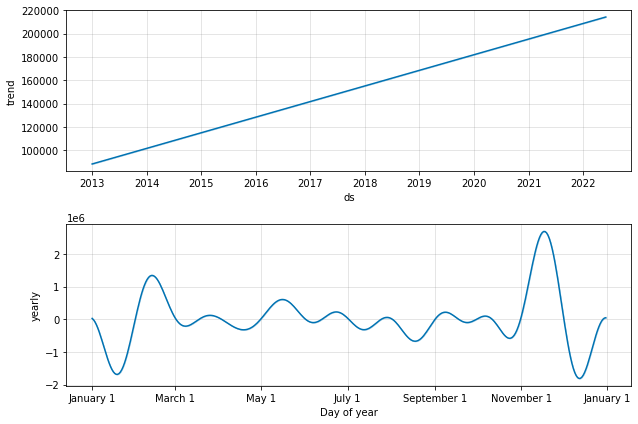

In [37]:

future = m.make_future_dataframe(periods=6, freq='MS')
forecast = m.predict(future)
# forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)
forecast.tail()

In [32]:
valid=pd.read_csv("valid.csv")
valid.head(1)

,date,median_sale_price,homes_sold
0,2022-01-01,194950.0,12.0


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
115,2022-08-01,216638.177852,161174.926339,325654.611134,216638.175273,216638.180698,24627.654296,24627.654296,24627.654296,24627.654296,24627.654296,24627.654296,0.0,0.0,0.0,241265.832148
116,2022-09-01,217775.857625,126143.842269,283272.216381,217775.854518,217775.861072,-15611.896825,-15611.896825,-15611.896825,-15611.896825,-15611.896825,-15611.896825,0.0,0.0,0.0,202163.960800
117,2022-10-01,218876.838051,148418.865579,300649.087327,218876.834336,218876.842111,7061.460827,7061.460827,7061.460827,7061.460827,7061.460827,7061.460827,0.0,0.0,0.0,225938.298878
118,2022-11-01,220014.517824,172395.027375,324508.045229,220014.513454,220014.522563,24012.043577,24012.043577,24012.043577,24012.043577,24012.043577,24012.043577,0.0,0.0,0.0,244026.561401
119,2022-12-01,221115.498249,296149.896389,460483.309776,221115.493279,221115.503807,152931.692492,152931.692492,152931.692492,152931.692492,152931.692492,152931.692492,0.0,0.0,0.0,374047.190742


In [ ]:
pyplot.plot(valid['median_sale_price', label='Actual')
pyplot.plot(forecast['yhat', label='Predicted')